In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import datacontrol
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn import svm
from sklearn.multioutput import MultiOutputRegressor

In [24]:
x = np.matrix([1,2,3])
y = np.array([1,2,3])
z = x.dot(y)
print(float(z))


14.0


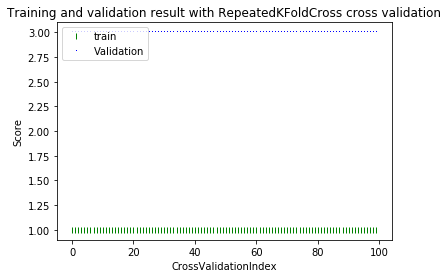

In [20]:
plt.plot(x, y, '|g', label='Training Score')
plt.plot(x, y_2, ',b',label='Validation Score')
plt.title('Training and validation result with RepeatedKFoldCross cross validation')
plt.xlabel('CrossValidationIndex')
plt.ylabel('Score')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

In [9]:
kf = KFold(n_splits=4)
svr = svm.SVR()
SVRegressor = MultiOutputRegressor(svr, n_jobs= 2)
for train, test in kf.split(x_train):
    #print("%s %s" % (train, test))
    X_train, x_test, Y_train, y_test = x_train[train], x_train[test], y_train[train], y_train[test]
    SVRegressor.fit(X_train, Y_train)
    score = SVRegressor.score(x_test, y_test)
    print(score)

[[2], [9], [0], [7], [1], [4], [6], [5], [8], [3]]


In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


ModuleNotFoundError: No module named 'tensorflow'

In [55]:
def svm_callback(X_train, x_test, Y_train, y_test):
    SVRegressor.fit(X_train, Y_train)
    return SVRegressor.score(x_test, y_test)

In [66]:
scores = (kFoldCross(SVRegressor.fit, SVRegressor.score, x_train, y_train))

In [74]:
scores = np.array(scores)

In [73]:
scores.std()*2

0.005368369141140551